# Regression Analysis on Canadian Housing Data

Regression is a statistical method used in machine learning, statistics, and econometrics to model the relationship between a dependent variable and one or more independent variables. The goal of regression analysis is to understand the nature of the relationship between variables, make predictions, and identify the strength and significance of the associations.

In simpler terms, regression helps to quantify the impact of changes in one variable on another. The basic idea is to fit a mathematical model to observed data, and this model can then be used to predict the values of the dependent variable for new or unseen data, it is used in continuous features.

In [1]:
import pandas as pd
import numpy as np

Read the data

In [2]:
data = pd.read_csv("data.csv", encoding = "ISO-8859-1")

It can be seen below that data has different kinds of variables. The target feature (the feature we want to predict) is "Price". 

Since it is given that there is no missing data, we will execute the remaining preprocessing steps on data.

In [3]:
data

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


## Data Preprocessing

Let's go through each column one by one. (Again, for the sake of practice.)

City

Plot the distribution of cities

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\gulme\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Column consists of 45 unique values and they are distributed like this: 


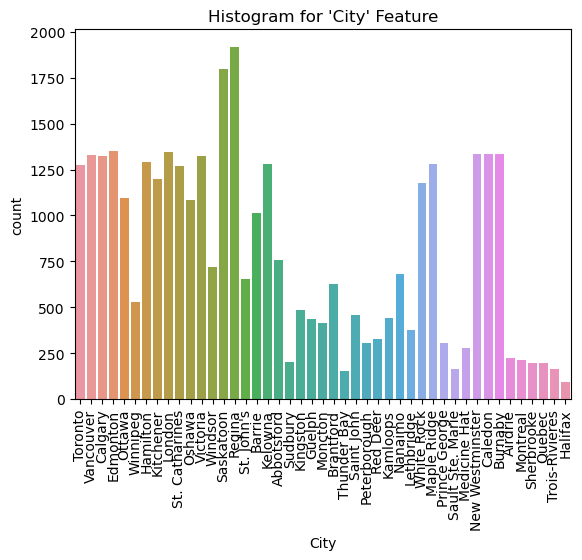

In [5]:
unique_cities = data['City'].unique()
print(f"Column consists of {unique_cities.shape[0]} unique values and they are distributed like this: ")

sns.countplot(x = "City", data = data) #Seaborn histogram
plt.title("Histogram for 'City' Feature")
plt.xticks(rotation=90) #Rotate the feature names for visibility
plt.show()

This column should be encoded since it's not numerical, One-Hot Encoding or Label Encoding can be used for this.

Label Encoding is chosen due to significance of unique values.

In [6]:
from sklearn.preprocessing import LabelEncoder #See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [7]:
cities = LabelEncoder().fit_transform(data['City']) #Transform the data
data['City'] = cities #Replace the encoded column with the original

In [8]:
data['City']

0        38
1        38
2        38
3        38
4        38
         ..
35763     9
35764     9
35765     9
35766     9
35767     9
Name: City, Length: 35768, dtype: int32

Address

This column can be handled by using key-words and training a NLP submodel. But for the sake of simplicity, it will be dropped.

In [9]:
data = data.drop(columns = 'Address',axis = 1)

Number_Beds

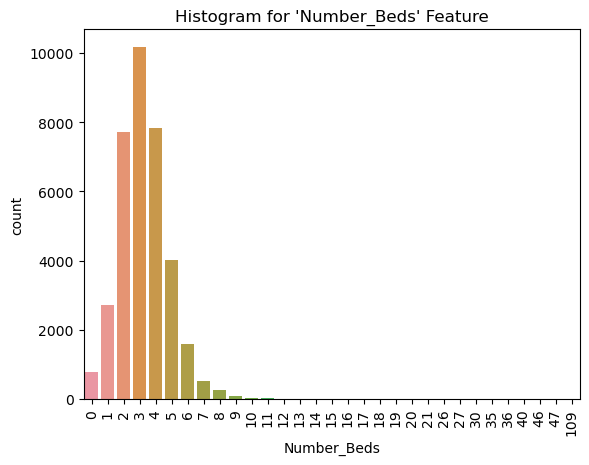

In [10]:
sns.countplot(x = "Number_Beds", data = data) #Seaborn histogram
plt.title("Histogram for 'Number_Beds' Feature")
plt.xticks(rotation=90) #Rotate the feature names for visibility
plt.show()

In Number_Beds, one of the cells contain 109. A house is not very likely to have 109 beds. So it will be dropped (not handled) for the sake of simplicity.

In [11]:
data = data.drop(9071)

In [12]:
data['Number_Beds'].unique() #It is fixed

array([ 3,  2,  4,  1,  0,  6,  5,  7,  8, 11,  9, 10, 15, 16, 12, 40, 30,
       20, 36, 14, 17, 46, 35, 21, 18, 47, 27, 26, 13, 19], dtype=int64)

Number_Baths

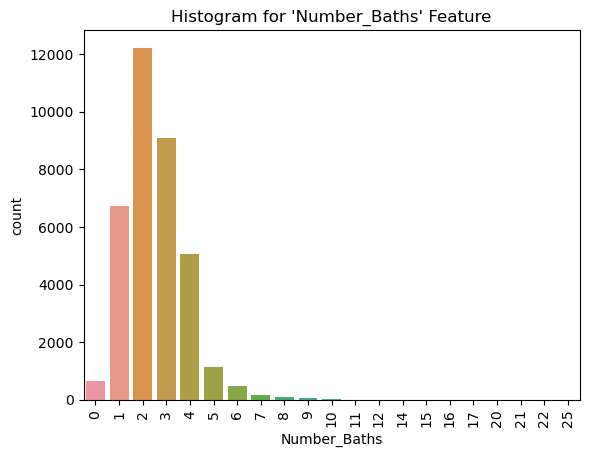

In [13]:
sns.countplot(x = "Number_Baths", data = data) #Seaborn histogram
plt.title("Histogram for 'Number_Baths' Feature")
plt.xticks(rotation=90) #Rotate the feature names for visibility
plt.show()

Province

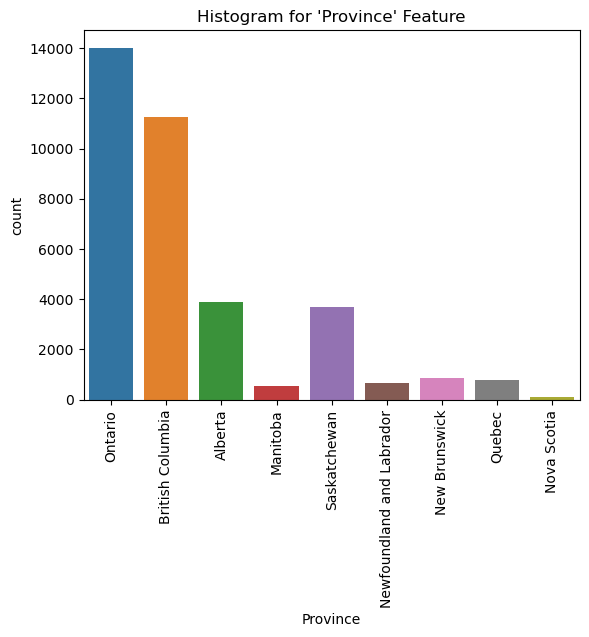

In [14]:
sns.countplot(x = "Province", data = data) #Seaborn histogram
plt.title("Histogram for 'Province' Feature")
plt.xticks(rotation=90) #Rotate the feature names for visibility
plt.show()

One Hot Encoding will be used this time with pd.get_dummies()

In [15]:
# One Hot encoded DataFrame for 'Province' column
provinces = pd.get_dummies(data['Province']) 

In [16]:
# Add the One Hot Encoded dataframes to original data
data = pd.concat([data, provinces], axis = 1)

In [17]:
# Drop the initial 'Province' column
data = data.drop(columns = 'Province', axis = 1)

Population

In [18]:
data['Population'].unique()

array([5647656, 2426160, 1306784, 1151635, 1068821,  758515,  729560,
        522888,  423369,  242460,  335949,  363222,  306519,  266141,
        226404,  185565,  154676,  181380,  153524,  166004,  136685,
        144356,  119785,  104688,  108843,   69895,   84793,  100844,
         97902,  106079,   98406,  109167,   90990,   76708,   72051,
         63382,   78916,   76581,  249125,   74100, 3675219,  172950,
        733156,  139163,  431479], dtype=int64)

Plot the boxplot for 'Population' column

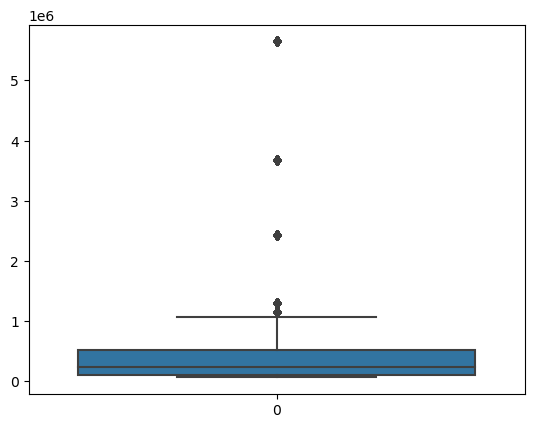

In [19]:
sns.boxplot(data = data['Population'])
plt.show()

Plot the distribution for 'Population' column

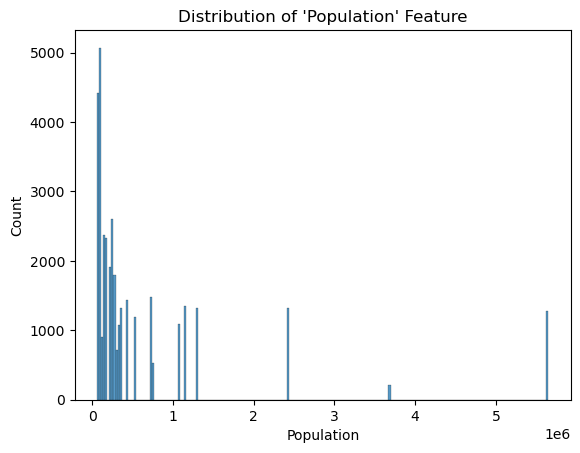

In [20]:
sns.histplot(data['Population'])
plt.title("Distribution of 'Population' Feature")
plt.show()

I chose not to drop outliers for this column due to the low number of unique values. But handling them is OK too.

Latitude & Longitude

Latitude and Longitude can be handled by extracting Z axis coordinates from them by calculating their euclidian values. But they will be dropped for the sake of simplicity.

In [21]:
data = data.drop(['Latitude', 'Longitude'], axis = 1)

Median_Family_Income

In [22]:
data['Median_Family_Income'].unique()

array([ 97000.,  90000., 100000.,  96000.,  98000.,  83000.,  91000.,
        92000.,  79500.,  77000., 102000.,  85000.,  82000.,  89000.,
        84000.,  74500.,  80000.,  74000.,  79000.,  87000.,  77500.,
        73000., 105000.,  88000.,  78000., 133000., 110000.,  76000.,
        65000.,  76500.,  62400.,  86753.])

Plot the boxplot for 'Median_Family_Income' column

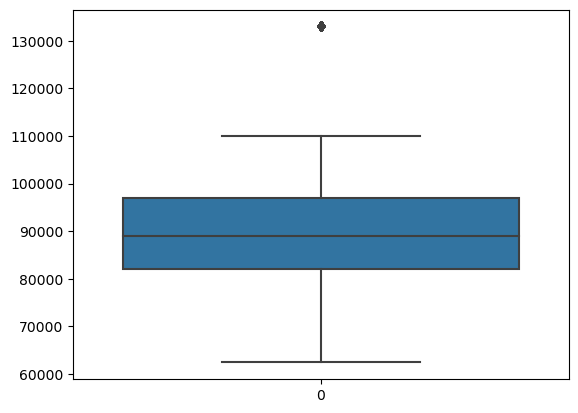

In [23]:
sns.boxplot(data = data['Median_Family_Income'])
plt.show()

Plot the distribution for 'Median_Family_Income' column

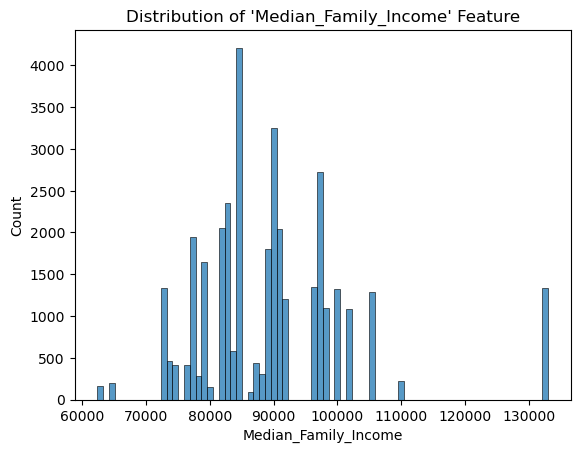

In [24]:
sns.histplot(data['Median_Family_Income'])
plt.title("Distribution of 'Median_Family_Income' Feature")
plt.show()

Same logic in 'Population' goes for 'Median_Family_Income' too.

Price

Plot the boxplot for 'Price' column

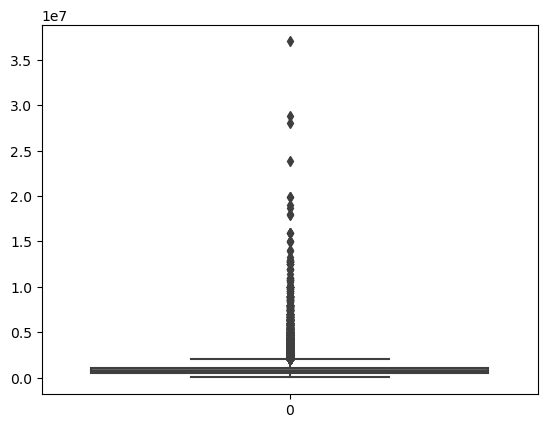

In [25]:
sns.boxplot(data = data['Price'])
plt.show()

Plot the distribution of 'Price' column

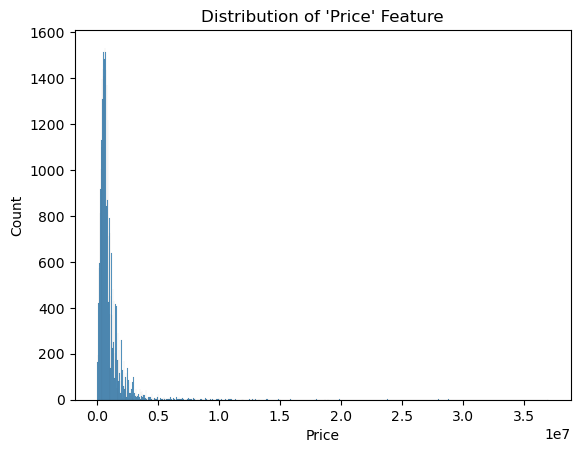

In [26]:
sns.histplot(data['Price'])
plt.title("Distribution of 'Price' Feature")
plt.show()

It can be seen from above, there is extreme outliers for the feature at hand.

Since regression models assumes the data is normally distributed, Interquartile Range method will be used to eliminate outliers.

Outliers will be dropped for the sake of simplicity.

In [27]:
def handle_outliers(data,data_column):
    sorted(data_column)
    Q1,Q3 = np.percentile(data_column, [25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
    return data.drop(outliers.index)

In [28]:
data = handle_outliers(data, data['Price'])

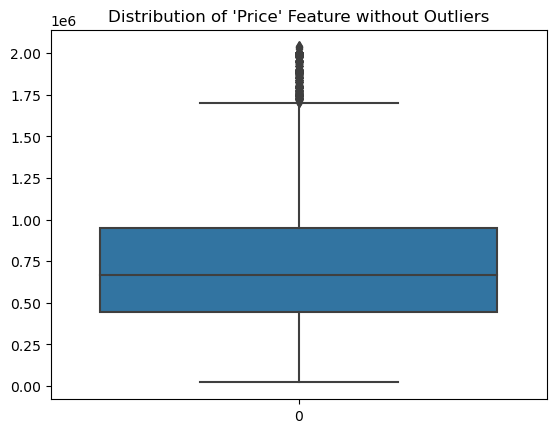

In [29]:
sns.boxplot(data = data['Price'])
plt.title("Distribution of 'Price' Feature without Outliers")
plt.show()

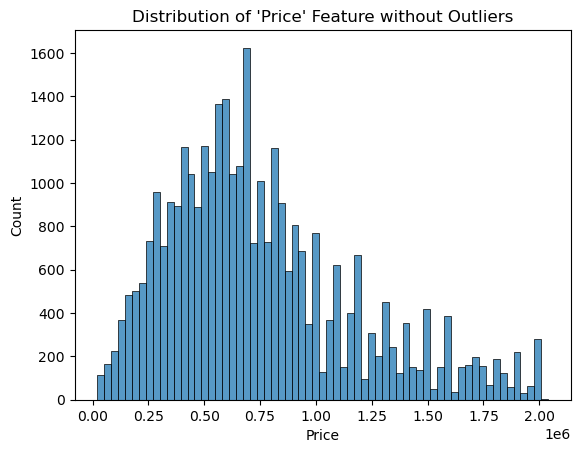

In [30]:
sns.histplot(data['Price'])
plt.title("Distribution of 'Price' Feature without Outliers")
plt.show()

It can be seen that from above, 'Price' feature is less noisy and has right-skewed distribution.

Now, Z-Score Scaling, MinMax Scaling will be done and their performance with each other and with unscaled data will be compared.

In [31]:
unscaled_data = data

Z-Score (Standard) Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
standard_data_array = StandardScaler().fit_transform(data) #See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
standard_data = pd.DataFrame(data = standard_data_array, columns = data.columns)

MinMax Scaling is better because it works better with OneHotEncoded features.

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
minmax_data_array = MinMaxScaler().fit_transform(data)
minmax_data = pd.DataFrame(data = minmax_data_array, columns = data.columns)

Examine correlations of the features with the target variable

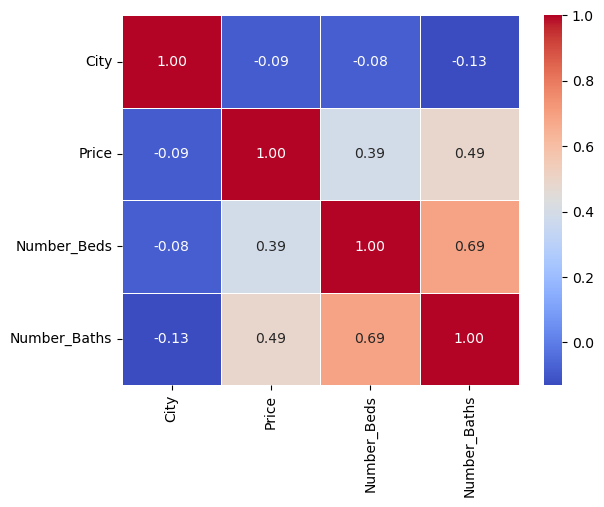

In [36]:
correlation_matrix = data.iloc[:,:4].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

City is not correlated with any of the features.

Price is positively correlated with Number_Baths and has a lower correlation with Number_Beds, indicating that if a house has a higher number of baths and beds, it tends to be more expensive.

Number_Beds and Number_Baths seems to be positively correlated.


Before training any model on them, datas need to be train test splitted.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
unscaled_X = unscaled_data.drop(columns = 'Price', axis = 1)
unscaled_y = unscaled_data['Price']
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(
        unscaled_X, unscaled_y, test_size=0.33, random_state=123)

In [39]:
minmax_X = minmax_data.drop(columns = 'Price', axis = 1)
minmax_y = minmax_data['Price']
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(
        minmax_X, minmax_y, test_size=0.33, random_state=123)

In [40]:
standard_X = standard_data.drop(columns = 'Price', axis = 1)
standard_y = standard_data['Price']
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(
        standard_X, standard_y, test_size=0.33, random_state=123)

Now we have 3 data at hand, unscaled_data, minmax_data, standard_data. We will compare these datas' performances on Linear Regression.

In [86]:
from sklearn.linear_model import LinearRegression #See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
unscaled_model = LinearRegression().fit(X_train_unscaled,y_train_unscaled)
y_pred_unscaled = unscaled_model.predict(X_test_unscaled)

In [87]:
r2_unscaled = unscaled_model.score(X_test_unscaled, y_test_unscaled)
mse_unscaled = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae_unscaled = mean_absolute_error(y_test_unscaled, y_pred_unscaled)

print(f"R2 Score for Unscaled Data is: {r2_unscaled:.2f}")
print(f"MSE Score for Unscaled Data is: {mse_unscaled:.2f}")
print(f"MAE Score for Unscaled Data is: {mae_unscaled:.2f}")

R2 Score for Unscaled Data is: 0.53
MSE Score for Unscaled Data is: 83737061907.62
MAE Score for Unscaled Data is: 208803.40


In [44]:
minmax_model = LinearRegression().fit(X_train_minmax, y_train_minmax)
y_pred_minmax = minmax_model.predict(X_test_minmax)

In [88]:
r2_minmax = minmax_model.score(X_test_minmax, y_test_minmax)
mse_minmax = mean_squared_error(y_test_minmax, y_pred_minmax)
mae_minmax = mean_absolute_error(y_test_minmax, y_pred_minmax)


print(f"R2 Score for Minmax Data is: {r2_minmax:.2f}")
print(f"MSE Score for Minmax Data is: {mse_minmax:.2f}")
print(f"MAE Score for Minmax Data is: {mae_minmax:.2f}")

R2 Score for Minmax Data is: 0.53
MSE Score for Minmax Data is: 0.02
MAE Score for Minmax Data is: 0.10


In [46]:
standard_model = LinearRegression().fit(X_train_standard, y_train_standard)
y_pred_standard = standard_model.predict(X_test_standard)

In [89]:
r2_standard = standard_model.score(X_test_standard, y_test_standard)
mse_standard = mean_squared_error(y_test_standard, y_pred_standard)
mae_standard = mean_absolute_error(y_test_standard, y_pred_standard)


print(f"R2 Score for Standard Data is: {r2_standard:.2f}")
print(f"MSE Score for Standard Data is: {mse_standard:.2f}")
print(f"MAE Score for Standard Data is: {mae_standard:.2f}")

R2 Score for Standard Data is: 0.53
MSE Score for Standard Data is: 0.47
MAE Score for Standard Data is: 0.49


For all 3 data we have, r2 scores are same. But if we look at the mean squared errors, minmax scaled data has the lowest error rate. We seen it coming because it worked well with the one hot encoded data. From now on, we will go with MinMax scaled data.

## Model Selection

7 models are going to be trained and evaluated:

### 1.Multiple Linear Regression

It is already trained in the previous step:

Model yielded:

R2 Score: 0.53

MSE Score: 0.02

MAE Score: 0.10

### 2. kNN Regression

kNN is a parametric model, so we need to determine the best k.

In [90]:
from sklearn.neighbors import KNeighborsRegressor #See https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [91]:
best_k = None
best_mse = float('inf') #Set initial best MSE to infinity

for k in range(1,22,3):
    knn = KNeighborsRegressor(n_neighbors = k).fit(X_train_minmax, 
                                                   y_train_minmax)
    y_pred_temp_knn = knn.predict(X_test_minmax)
    
    temp_mse_knn = mean_squared_error(y_test_minmax, y_pred_temp_knn)
    if temp_mse_knn < best_mse:
        best_mse = temp_mse_knn
        best_k = k

minmax_knn = KNeighborsRegressor(n_neighbors = best_k).fit(X_train_minmax,                                                           y_train_minmax)
y_pred_knn = minmax_knn.predict(X_test_minmax)

r2_knn = minmax_knn.score(X_test_minmax, y_test_minmax)
mse_knn = mean_squared_error(y_test_minmax, y_pred_knn)
mae_knn = mean_absolute_error(y_test_minmax, y_pred_knn)

In [92]:
print(f"R2 Score for kNN (k = {best_k}) is: {r2_knn:.2f}")
print(f"MSE Score for kNN (k = {best_k}) is: {mse_knn:.2f}")
print(f"MAE Score for kNN (k = {best_k}) is: {mae_knn:.2f}")

R2 Score for kNN (k = 19) is: 0.63
MSE Score for kNN (k = 19) is: 0.02
MAE Score for kNN (k = 19) is: 0.09


### 3: Random Forest Regression

In [93]:
from sklearn.ensemble import RandomForestRegressor #See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [94]:
minmax_rf = RandomForestRegressor().fit(X_train_minmax, y_train_minmax)
y_pred_rf = minmax_rf.predict(X_test_minmax)

r2_rf = minmax_rf.score(X_test_minmax, y_test_minmax)
mse_rf = mean_squared_error(y_test_minmax, y_pred_rf)
mae_rf = mean_absolute_error(y_test_minmax, y_pred_rf)

In [95]:
print(f"R2 Score for Random Forest Regressor is: {r2_rf:.2f}")
print(f"MSE Score for Random Forest Regressor is: {mse_rf:.2f}")
print(f"MAE Score for Random Forest Regressor is: {mae_rf:.2f}")

R2 Score for Random Forest Regressor is: 0.64
MSE Score for Random Forest Regressor is: 0.02
MAE Score for Random Forest Regressor is: 0.09


### 4. Support Vector Regression

In [96]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

In [97]:
minmax_svr = make_pipeline(MinMaxScaler(), SVR(C=1.0, epsilon=0.2)).fit(X_train_minmax, y_train_minmax)
y_pred_svr = minmax_svr.predict(X_test_minmax)

r2_svr = minmax_svr.score(X_test_minmax, y_test_minmax)
mse_svr = mean_squared_error(y_test_minmax, y_pred_svr)
mae_svr = mean_absolute_error(y_test_minmax, y_pred_svr)

In [98]:
print(f"R2 Score for Support Vector Regressor is: {r2_svr:.2f}")
print(f"MSE Score for Support Vector Regressor is: {mse_svr:.2f}")
print(f"MAE Score for Support Vector Regressor is: {mae_svr:.2f}")

R2 Score for Support Vector Regressor is: 0.51
MSE Score for Support Vector Regressor is: 0.02
MAE Score for Support Vector Regressor is: 0.12


### 5.Neural Network Regression

In [99]:
from sklearn.neural_network import MLPRegressor #See https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [100]:
minmax_mlp = MLPRegressor().fit(X_train_minmax, y_train_minmax)
y_pred_mlp = minmax_mlp.predict(X_test_minmax)

r2_mlp = minmax_mlp.score(X_test_minmax, y_test_minmax)
mse_mlp = mean_squared_error(y_test_minmax, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test_minmax, y_pred_mlp)

In [101]:
print(f"R2 Score for MLP Regressor is: {r2_mlp:.2f}")
print(f"MSE Score for MLP Regressor is: {mse_mlp:.2f}")
print(f"MAE Score for MLP Regressor is: {mae_mlp:.2f}")

R2 Score for MLP Regressor is: 0.58
MSE Score for MLP Regressor is: 0.02
MAE Score for MLP Regressor is: 0.10


### 6. XGBoost Regression

In [102]:
from sklearn.ensemble import GradientBoostingRegressor #See https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [103]:
minmax_gb = GradientBoostingRegressor(random_state=0).fit(X_train_minmax, y_train_minmax)
y_pred_gb = minmax_gb.predict(X_test_minmax)

r2_gb = minmax_gb.score(X_test_minmax, y_test_minmax)
mse_gb = mean_squared_error(y_test_minmax, y_pred_gb)
mae_gb = mean_absolute_error(y_test_minmax, y_pred_gb)

In [104]:
print(f"R2 Score for Gradient Boosting Regressor is: {r2_gb:.2f}")
print(f"MSE Score for Gradient Boosting Regressor is: {mse_gb:.2f}")
print(f"MAE Score for Gradient Boosting Regressor is: {mae_gb:.2f}")

R2 Score for Gradient Boosting Regressor is: 0.63
MSE Score for Gradient Boosting Regressor is: 0.02
MAE Score for Gradient Boosting Regressor is: 0.09


## Model Evaluation

In [105]:
r2 = [r2_minmax, r2_knn, r2_rf, r2_svr, r2_mlp, r2_gb]
labels = ["LR", "KNN", "RF", "SVR", "MLP", "GB"]
mse = [mse_minmax, mse_knn, mse_rf, mse_svr, mse_mlp, mse_gb]
mae = [mae_minmax, mae_knn, mae_rf, mae_svr, mae_mlp, mae_gb]

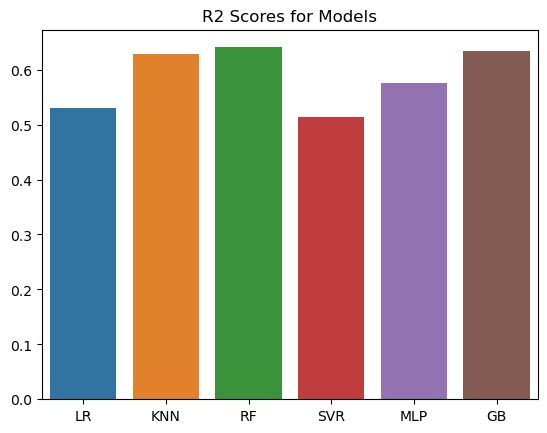

In [106]:
sns.barplot(x = labels, y = r2)
plt.title("R2 Scores for Models")
plt.show()

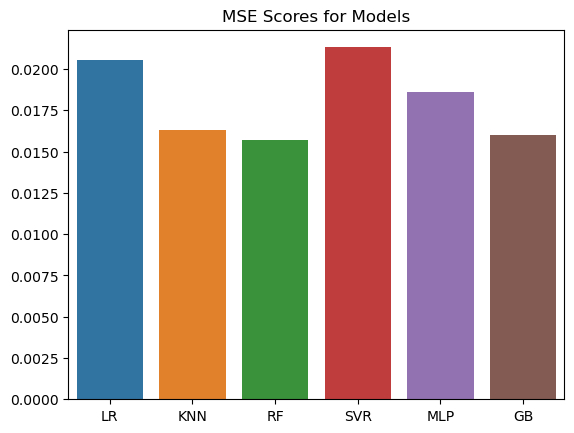

In [107]:
sns.barplot(x = labels, y = mse)
plt.title("MSE Scores for Models")
plt.show()

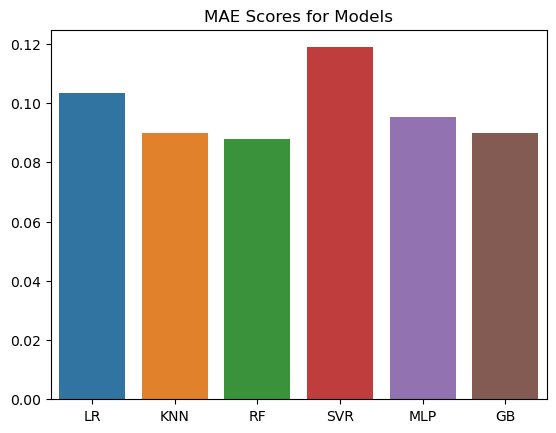

In [108]:
sns.barplot(x = labels, y = mae)
plt.title("MAE Scores for Models")
plt.show()

## Conclusion

In this report, a data that contains the attributes and prices of certain houses in Canada. Data has over 35000 samples and 10 dimensions. By visualizing and properly preprocessing all dimensions, categorical features are converted to numeric features in order to pass them into the model. In the end, data has been reduced to 4 dimensions including the target variable.

Data is scaled in 2 different ways, in the end 3 different versions of the data is obtained. Unscaled data, Standard scaled data and MinMax scaled data. Linear Regression is trained on all 3 datasets abd their performance was evaluated by using 3 metrics. R2, MSE and MAE. After comparing the results, minmax scaled data yielded the best performance among all 3. That can be foreseen by simply inspecting the data manually, because minmax scaled data doesnt change the binary one hot encoded variables. So they yielded a more accurate performance.

Proceeding with MinMax scaled data, 5 more models are trained on the data. kNN Regression, Random Forest Regression, Support Vector Regression, Multi Layer Perceptrons and Gradient Boosting Regression.

All of their performances was compared with the same 3 metrics, and all models yield r2 scores between 0.50 - 0.65, best model was the Random Forest Regressor. Gradient Boosting Regressor was also close to Random Forest. But if errors were inspected, it can be concluded that SVR has the lowest performance, RF and GB has relatively better perfromance among them.

This project can be improved by involving a more advanced preprocessing step and hyperparameter tuning. But for the sake of simplicity, those were neglected.